In [38]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [39]:
# read train 
train = pd.read_csv("train.csv")
print(train.shape)
train.head(10)

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# read test 
test=pd.read_csv('test.csv')
#print(test.shape)
#test.head()

In [41]:
#x_train=train.iloc[:,range(1,785)]
#y_train=train.iloc[:,0]

xtrain = train.drop(labels = ["label"],axis = 1) 
ytrain = train["label"]



In [42]:
print("features.shape:", xtrain.shape)
print("targets.shape:", ytrain.shape)

features.shape: (42000, 784)
targets.shape: (42000,)


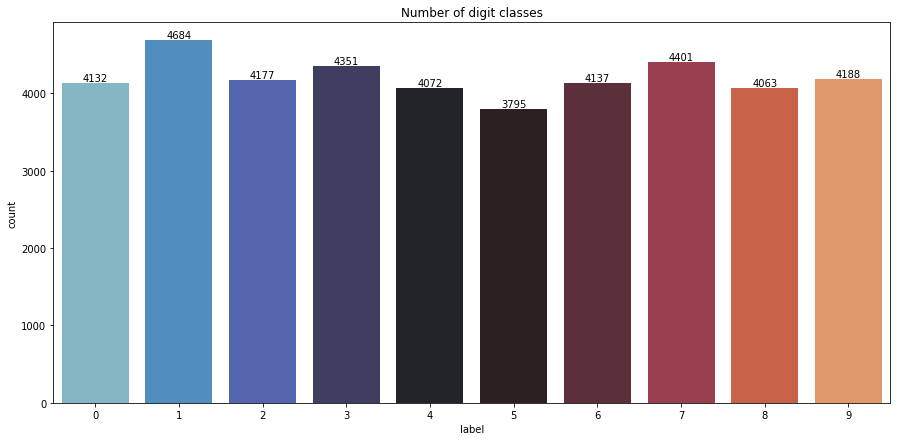

In [43]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
ax = sns.countplot(ytrain, palette="icefire")
plt.title("Number of digit classes")

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(p.get_height()), (x.mean(), y), ha='center', va='bottom')



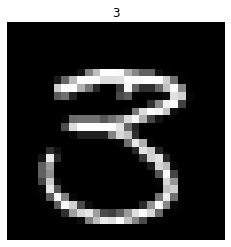

In [44]:
# plot some samples
img = xtrain.iloc[7].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[7,0])
plt.axis("off")
plt.show()


In [45]:
# Normalize the data
xtrain = xtrain / 255.0
test = test / 255.0
print("xtrain shape: ",xtrain.shape)
print("test shape: ",test.shape)

xtrain shape:  (42000, 784)
test shape:  (28000, 784)


In [46]:
# Reshape
x_train = xtrain.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",x_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [47]:
# Label Encoding 
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
y_train = to_categorical(ytrain, num_classes = 10)

In [48]:
#y_train[3,:] =4

In [49]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=2)
print("X_train shape",X_train.shape)
print("X_test shape",X_val.shape)
print("Y_train shape",Y_train.shape)
print("Y_test shape",Y_val.shape)

X_train shape (37800, 28, 28, 1)
X_test shape (4200, 28, 28, 1)
Y_train shape (37800, 10)
Y_test shape (4200, 10)


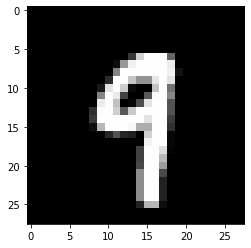

In [50]:
# Some examples
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

#plt.imshow(X_train[2,:,:],cmap='gray')
#plt.show()

In [60]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [61]:
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [62]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)              

In [54]:
epochs = 10  # for better result increase the epochs
batch_size = 250

In [55]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [56]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 15s 97ms/step - loss: 1.3173 - accuracy: 0.5540 - val_loss: 0.3229 - val_accuracy: 0.9243
Epoch 2/10
151/151 [==============================] - 14s 96ms/step - loss: 0.6007 - accuracy: 0.8049 - val_loss: 0.1862 - val_accuracy: 0.9531
Epoch 3/10
151/151 [==============================] - 14s 96ms/step - loss: 0.4465 - accuracy: 0.8566 - val_loss: 0.1446 - val_accuracy: 0.9643
Epoch 4/10
151/151 [==============================] - 15s 97ms/step - loss: 0.3795 - accuracy: 0.8777 - val_loss: 0.1231 - val_accuracy: 0.9686
Epoch 5/10
151/151 [==============================] - 14s 96ms/step - loss: 0.3375 - accuracy: 0.8943 - val_loss: 0.1111 - val_accuracy: 0.9700
Epoch 6/10
151/151 [==============================] - 15s 97ms/step - loss: 0.3066 - accuracy: 0.9025 - val_loss: 0.1058 - val_accuracy: 0.9719
Epoch 7/10
151/151 [==============================] - 14s 96ms/step - loss: 0.2844 - accuracy: 0.9106 - val_loss: 0.0969 - val_accuracy:

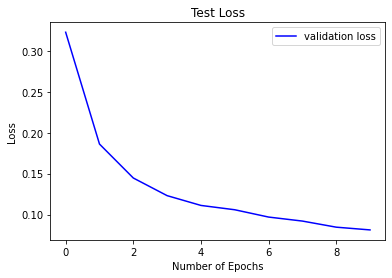

In [57]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

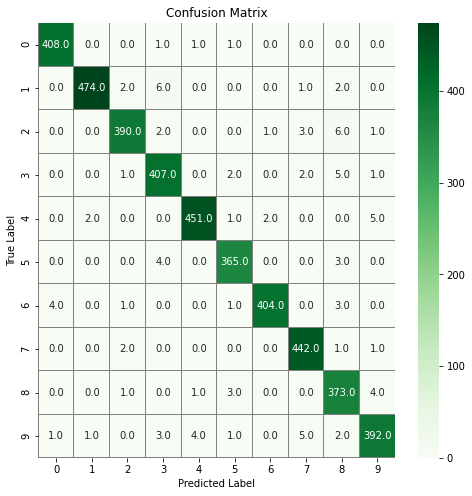

In [58]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()